In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.layers import Dense
# from sklearn.preprocessing import Dropout
from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.preprocessing import EarlyStopping
from sklearn.datasets import make_circles
import seaborn as sns

In [14]:
x,y=make_circles(n_samples=100, noise=0.1,random_state=1)

<Axes: >

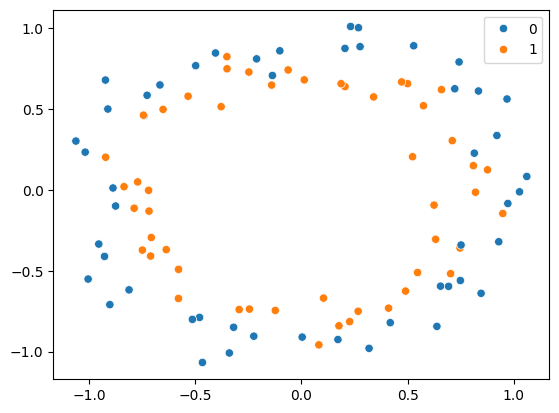

In [15]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

C:\Users\shail sharma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(x_train,y_train,epochs=3500,validation_data=(x_test,y_test))

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.4031 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6958
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5047 - loss: 0.6919 - val_accuracy: 0.4000 - val_loss: 0.7009
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4977 - loss: 0.6881 - val_accuracy: 0.3000 - val_loss: 0.7054
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5164 - loss: 0.6857 - val_accuracy: 0.3000 - val_loss: 0.7108
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5617 - loss: 0.6839 - val_accuracy: 0.3000 - val_loss: 0.7165
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4953 - loss: 0.6902 - val_accuracy: 0.3000 - val_loss: 0.7215
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5445 - loss: 0.6808 - val_accuracy: 0.3000 - val_loss: 0.7264
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5602 - loss: 0.6779 - val_accuracy: 0.3000 - v

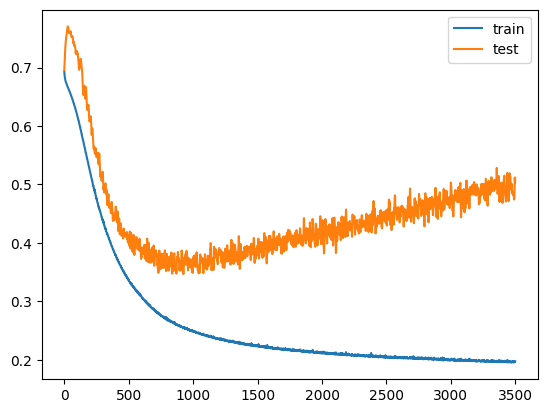

In [20]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 521us/step


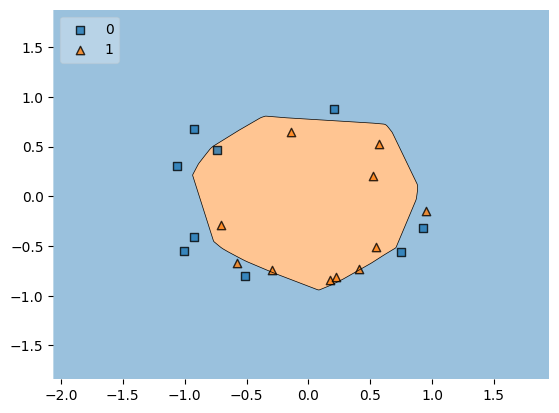

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)
plt.show()

# Early Stopping

In [23]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

C:\Users\shail sharma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
callbacks=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [35]:
history=model.fit(x_train,y_train,epochs=3500,validation_data=(x_test,y_test),callbacks=callbacks)

Epoch 1/3500


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7039 - loss: 1.7662 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7570 - loss: 1.3891 - val_accuracy: 0.9500 - val_loss: 0.0761
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8203 - loss: 0.8124 - val_accuracy: 0.9500 - val_loss: 0.2562
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8102 - loss: 0.8502 - val_accuracy: 0.9000 - val_loss: 0.4034
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7805 - loss: 0.8144 - val_accuracy: 0.9000 - val_loss: 0.4814
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7766 - loss: 0.7822 - val_accuracy: 0.9000 - val_loss: 0.4195
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8164 - loss: 0.6632 - val_accuracy: 0.9000 - val_loss: 0.3478
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8445 - loss: 0.6061 - val_accuracy: 0.9500 - val_loss: 0.29

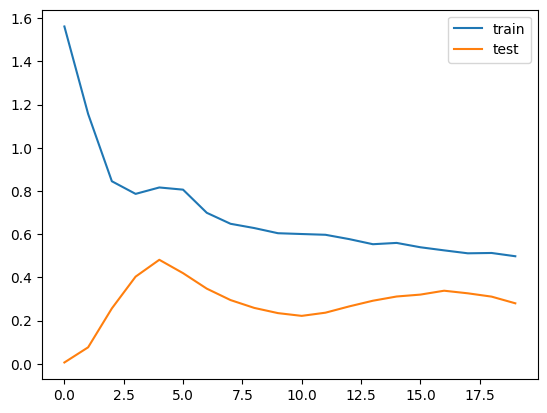

In [36]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 506us/step


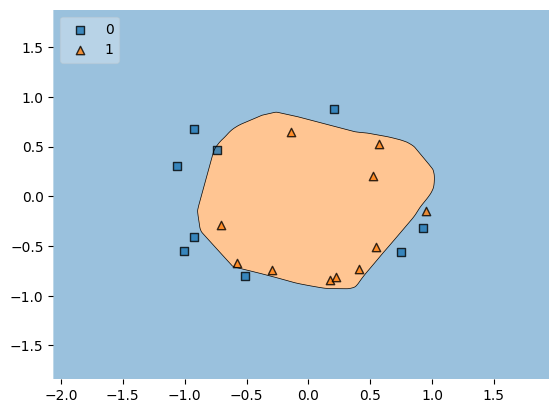

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)
plt.show()